<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/30.%20Forecasting_Data_Driven_Models_28_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: >

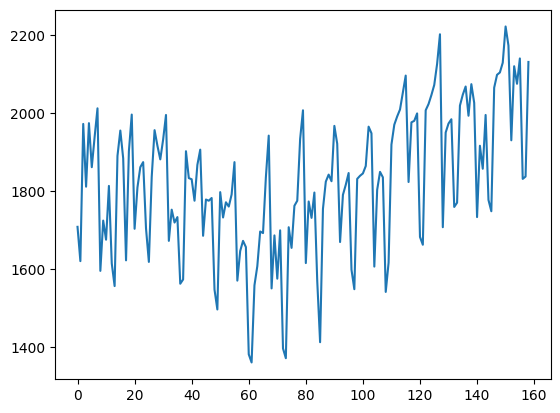

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

# Splitting data

In [4]:
# Splitting the dataset into training and testing
Train = Walmart.head(147)
Test = Walmart.tail(12)

# Moving Average

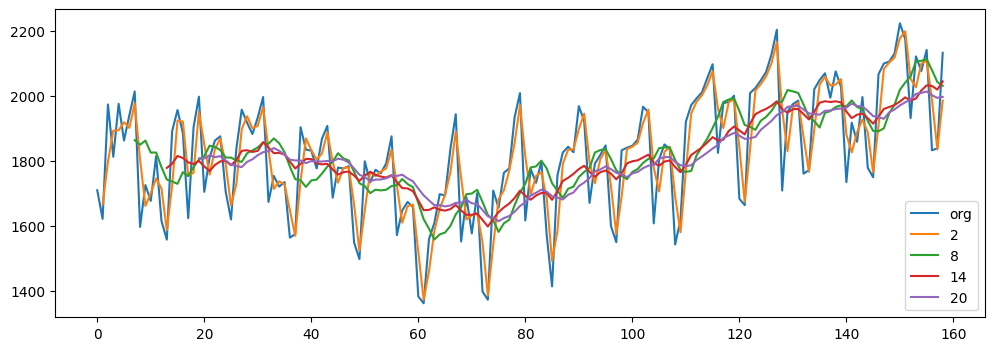

In [5]:
# Applying the smoothing technique
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    # selecting the window size - starting from 2 with a gap of 6. So, 2,8,14 & 20 as the max it can be is 24. It'll remove all variations & tell us underlying trend
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot


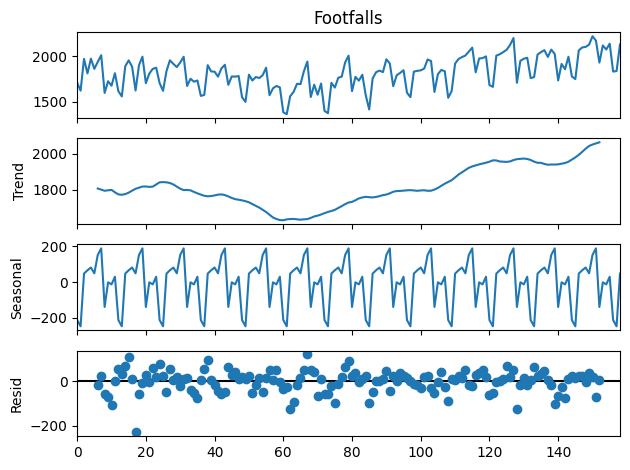

In [6]:
# We can also understand the underlying trend , seasonality by using seasonal decompose.
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


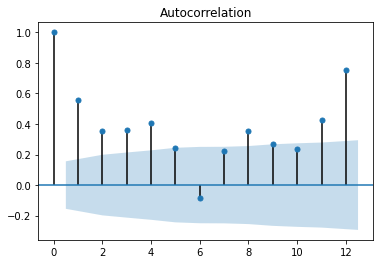

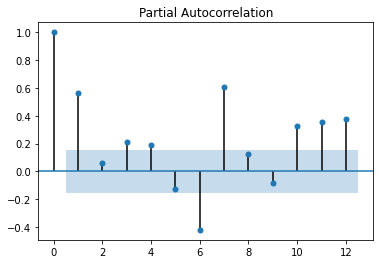

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


### Evaluation Metric MAPE

In [8]:
# Defining the evaluation criteria/metric - MAPE = mean absolute percentage error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100 # abs = absolute, pred-org/org x 100 is the percent error
    return np.mean(temp)  # we then take its mean

### Simple Exponential Method


In [9]:
# Building the mode
# Simple exponential smooting technique
# alpha = 0.2, fitting it on training dataset and then testing it on testing data set.
# then find out the error
Train["Footfalls"] = Train["Footfalls"].astype('double')
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls)

<ipython-input-9-4252a74e5ba9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Footfalls"] = Train["Footfalls"].astype('double')
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


8.490637057828376

### Holt method

In [10]:
# Holt method - level and trend
# We are experiment with both alpha and beta. smoothing level = alpha and smoothing slope = beta
# Fitting that model on the training data and testing it on testing dat
# Then find out the error
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls)

<ipython-input-10-8aa47bd0fdd2>:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


7.546249229496056

### Holts winter exponential smoothing with additive seasonality and additive trend


In [11]:
# Holts winter smoothing method - level, trend & seasonality
# Here we are working with additive seasonality and trending model and find out the error

hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls)

2.0083954068872694

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [12]:
# Holts winter smoothing method - level, trend & seasonality
# Here we are working with multiplicative seasonality and trending model and find out the error

hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

2.9678498441563517

In [13]:
# So far, Holts winter smoothing method with an additive seasonality is the best model

## Final Model by combining train and test

In [14]:
# Using Additive seasonality holts winter model and fitting it on the entire dataset to train for forecasting/predictions

In [15]:
Walmart["Footfalls"] = Walmart["Footfalls"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [16]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

,0
159,2153.270022
160,2180.806271
161,2155.360593
162,2244.062090
163,2274.339502
164,1965.419562
165,2125.253616
166,2106.353304
167,2152.544112
168,1903.654840


In [17]:
# Here, we are working on the footfall dataset using data driven model